# Valiya Kalladi W.B. et al. 2025
## Below codes were used in making the final plots of the various figures and then edited into viewer friendly formats manually in power point

#### First importing the essential packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.colors import LogNorm
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import string
import scikit_posthocs as sp
from scipy import stats
from itertools import combinations

# Figure 2 Heatmap
### Creating the heatmap for growth by strains under various temperatures.

In [2]:
df_Cluster=pd.read_excel("Temp.xlsx", sheet_name="df_Cluster")
df_Cluster.set_index('Strain', inplace=True)

df_Hex=pd.read_excel("Temp.xlsx", sheet_name="df_Hex")
df_Tree_List=pd.read_excel("Temp.xlsx", sheet_name="df_Tree_List")
Library=pd.read_excel("Temp.xlsx", sheet_name="Library")

In [3]:
#Get Taxa and set strain as index
df_Taxa = Library.loc[:, ["phylum","class", "order", "family", "genus", "species", "strain"]]
df_Taxa.set_index('strain')
#defining Class and Order
df_LibPlotOrd = df_Cluster.index.to_series().map(df_Taxa.set_index('strain')['order'])
df_LibPlotCla = df_Cluster.index.to_series().map(df_Taxa.set_index('strain')['class'])
#setting colour palette
C= sns.color_palette('Spectral', n_colors=14)
D= sns.color_palette('Set1', n_colors=6)
#Setting lut

lut= dict(zip(df_LibPlotOrd.unique(), C))
lut1 = dict(zip(df_LibPlotCla.unique(), D))

In [4]:
PhyOrder = df_Tree_List["Strain"].tolist()

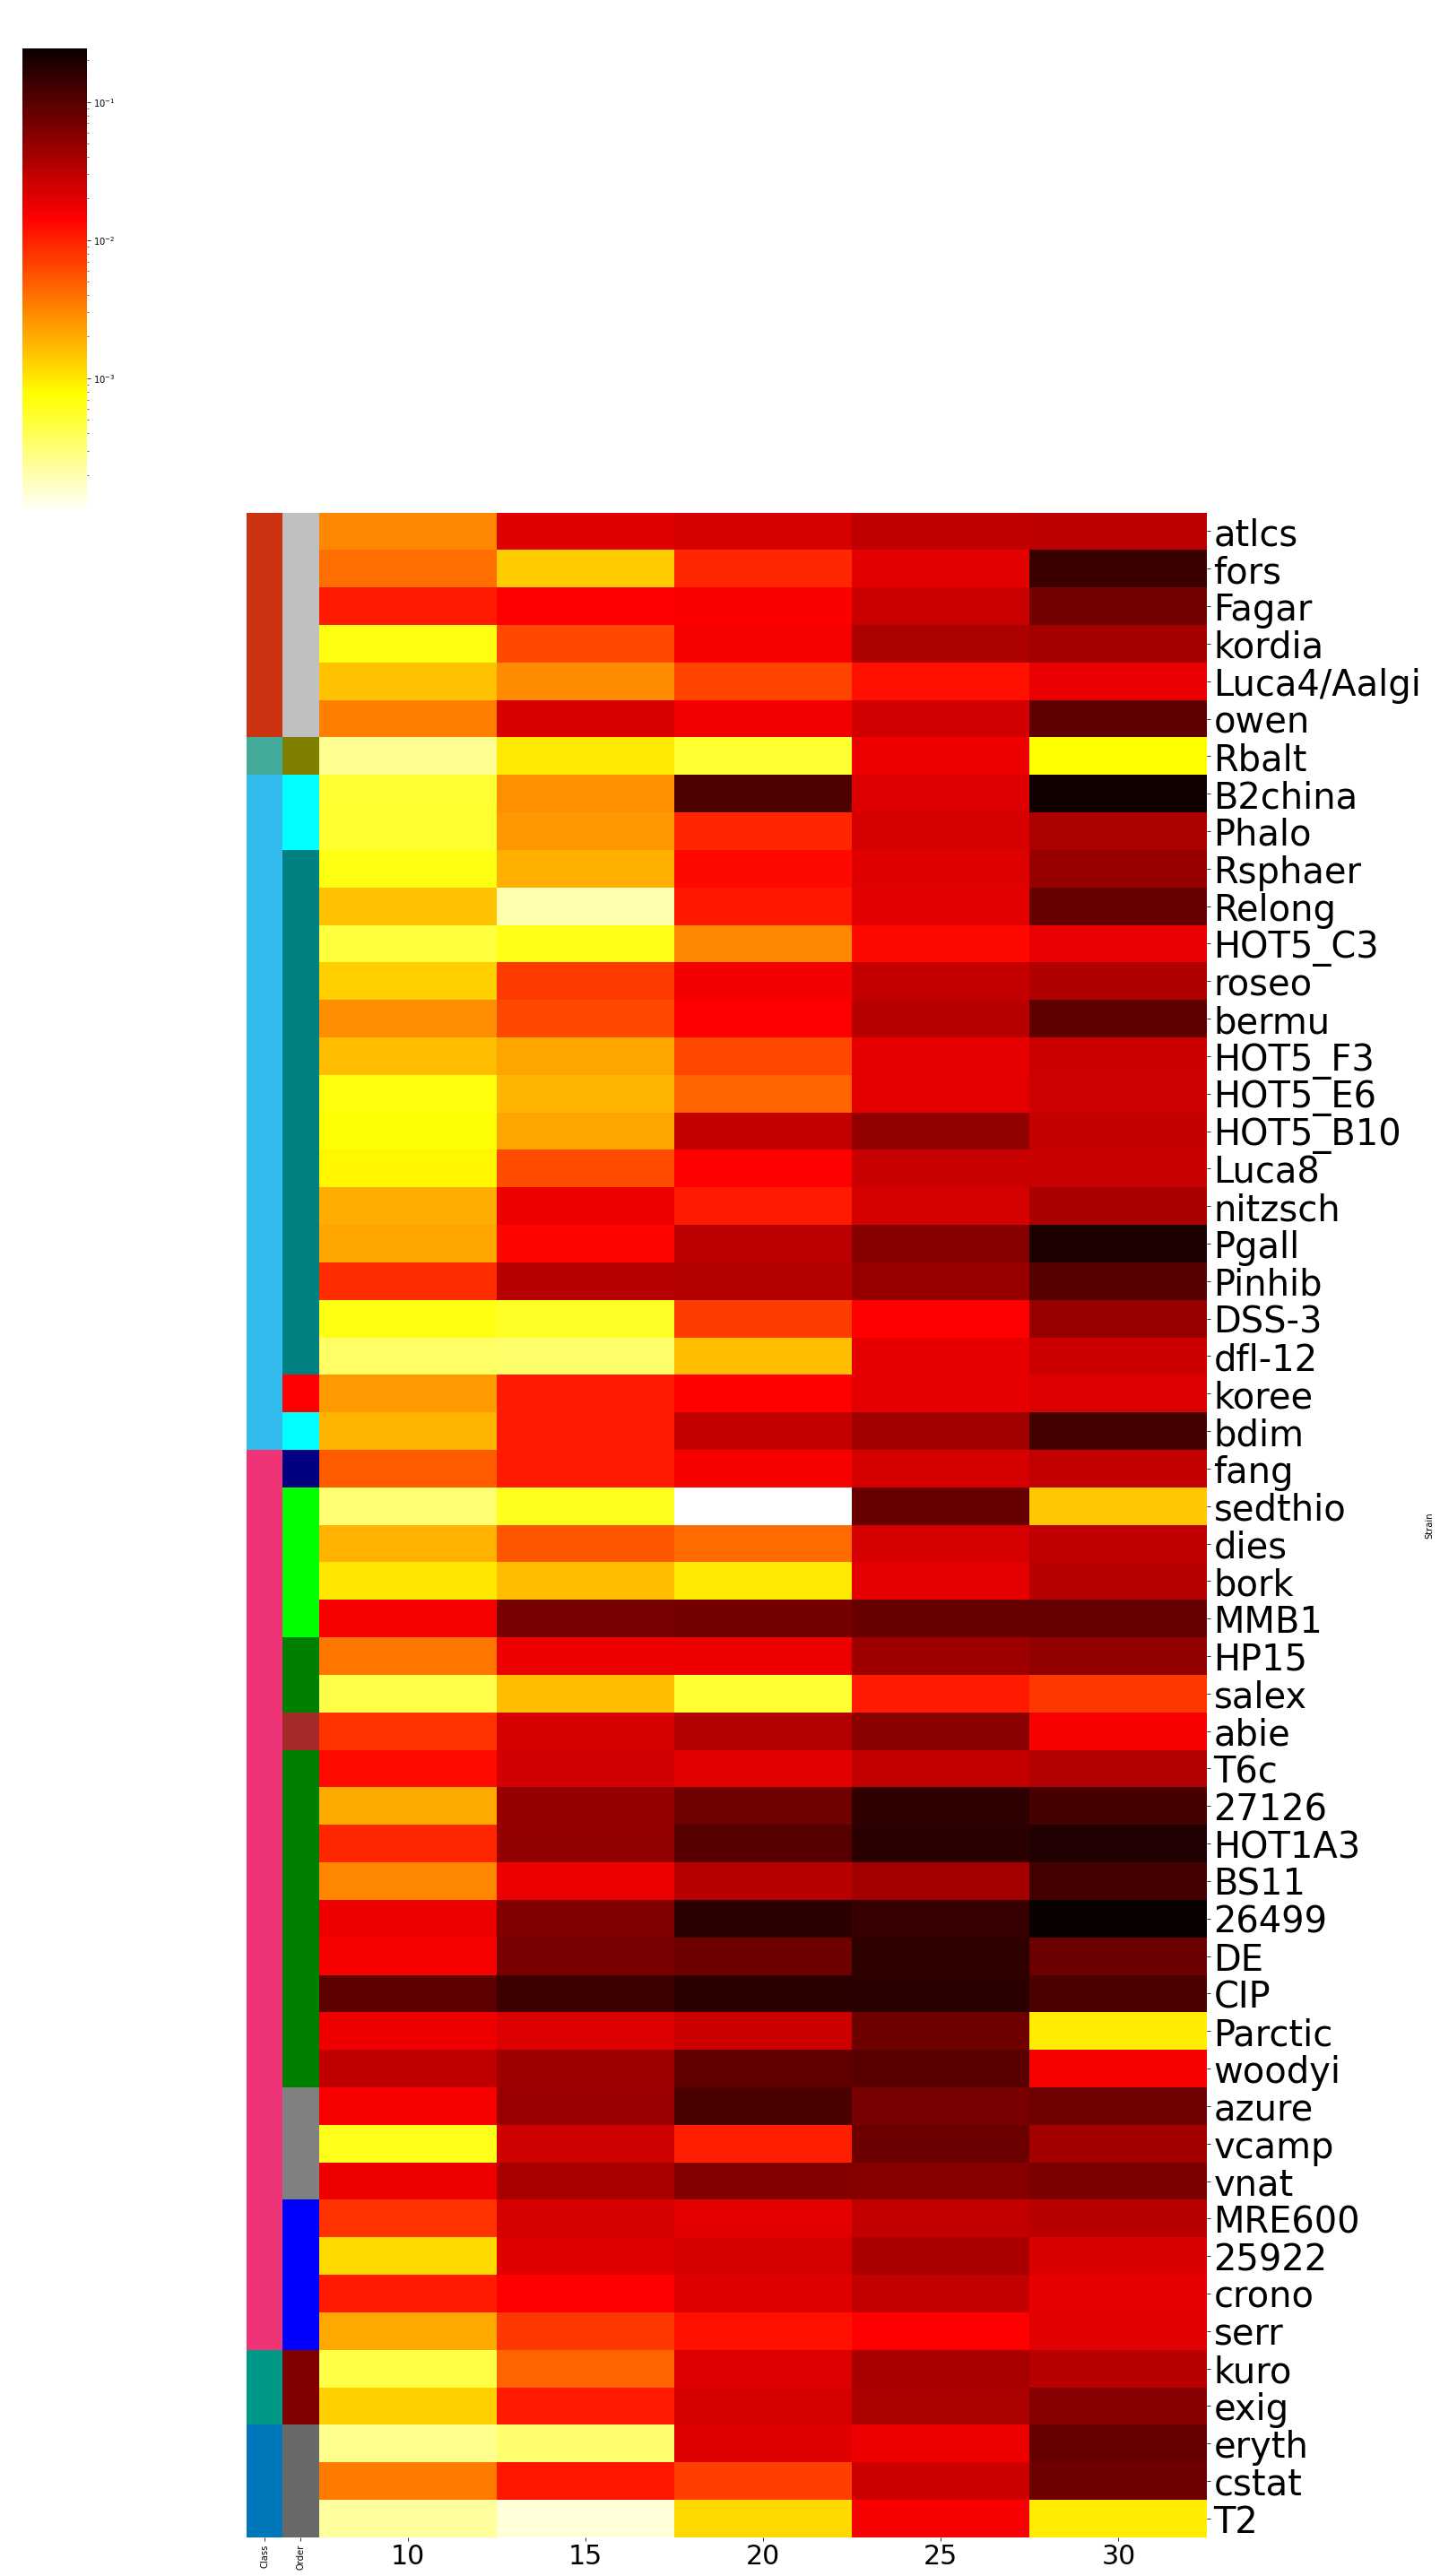

In [5]:
# Convert everything to strings
df_Cluster.index = df_Cluster.index.astype(str)
PhyOrder = [str(strain) for strain in PhyOrder]

#ensuring string dtype
df_Cluster.index = df_Cluster.index.astype(str)
df_Hex['Strain'] = df_Hex['Strain'].astype(str)


# Filter df_Cluster to include only strains in PhyOrder
df_Cluster_filtered = df_Cluster.loc[df_Cluster.index.isin(PhyOrder)]

# Filter PhyOrder to include only strains in df_Cluster
PhyOrder_filtered = [strain for strain in PhyOrder if strain in df_Cluster_filtered.index]


# Reorder df_Cluster based on filtered PhyOrder
df_Cluster_ordered = df_Cluster_filtered.reindex(PhyOrder_filtered)

# Mapping Class and Order
df_LibPlotOrd = df_Cluster_ordered.index.to_series().map(df_Hex.set_index('Strain')['Order'])
df_LibPlotCla = df_Cluster_ordered.index.to_series().map(df_Hex.set_index('Strain')['Class'])

# Setting color palette using unique colors
unique_order_colors = df_Hex.drop_duplicates('Order')[['Order', 'Hex Order']].set_index('Order')['Hex Order']
unique_class_colors = df_Hex.drop_duplicates('Class')[['Class', 'Hex Class']].set_index('Class')['Hex Class']

# Create lookup dictionaries
lut = dict(zip(unique_order_colors.index, unique_order_colors))
lut1 = dict(zip(unique_class_colors.index, unique_class_colors))

# Map colors to the DataFrame
Order_colour = pd.DataFrame({'Order': df_LibPlotOrd.map(lut)})
Class_colour = pd.DataFrame({'Class': df_LibPlotCla.map(lut1)})
row_colors = pd.concat([Class_colour, Order_colour], axis=1)

# Plotting
LibClustOrd = sns.clustermap(df_Cluster_ordered, row_colors=row_colors,
                             dendrogram_ratio=0.2, figsize=(20, 40), cmap='hot_r',
                             col_cluster=False, row_cluster=False, yticklabels=True, norm=LogNorm())

LibClustOrd.ax_heatmap.set_xticklabels(LibClustOrd.ax_heatmap.get_xmajorticklabels(), fontsize=30)
LibClustOrd.ax_heatmap.set_yticklabels(LibClustOrd.ax_heatmap.get_ymajorticklabels(), fontsize=40)



plt.show()

# Figure 3 Heat Map
### making the Heat map for the casein experiment.


In [6]:
e=pd.read_excel("df_Casein.xlsx", sheet_name="Casein")
e.set_index('Strain', inplace=True)

df_Casmax=pd.read_excel("df_Casein.xlsx", sheet_name="Max")

In [7]:
# Make sure Strain column is string without leading/trailing spaces
df_Hex['Strain'] = df_Hex['Strain'].astype(str).str.strip()

# Create a dictionary mapping strains to their hex colors
strain_colors = dict(zip(df_Hex['Strain'], df_Hex['Hex Class']))

# Add the control strain with black color if it's in PhyOrder
if 'Ctrl' in PhyOrder:
    strain_colors['Ctrl'] = '#000000'

In [8]:
# Kruskal-Wallis test
groups = [group["OD600"].values for name, group in df_Casmax.groupby("Media")]
h_stat, p_val = stats.kruskal(*groups)

#Post-hoc Dunn test
dunn = sp.posthoc_dunn(df_Casmax, val_col='OD600', group_col='Media', p_adjust='fdr_bh')

#Function to assign letters based on significance
def assign_letters(dunn_matrix, alpha=0.05):
    """
    Assigns letters to groups: groups not significantly different share letters.
    """
    groups = dunn_matrix.index.tolist()
    letters = {g: '' for g in groups}
    current_letter = 'a'
    
    unassigned = set(groups)
    
    while unassigned:
        # pick first unassigned group
        g = list(unassigned)[0]
        letters[g] += current_letter
        unassigned.remove(g)
        
        # assign same letter to all groups not significantly different from g
        for other in list(unassigned):
            if dunn_matrix.loc[g, other] >= alpha:
                letters[other] += current_letter
                unassigned.remove(other)
        
        # next letter
        current_letter = chr(ord(current_letter) + 1)
    
    return letters

letters_dict = assign_letters(dunn)
print("Letters per group:", letters_dict)


Letters per group: {'Amino Acid Hydrolysate': 'b', 'Amino Acid Hydrolysate w/OS': 'c', 'MMB': 'd', 'MMB Negative': 'c', 'Protein Tryptone': 'd', 'Protein Tryptone w/OS': 'a', 'Whole Protein': 'a', 'Whole Protein w/OS': 'a'}


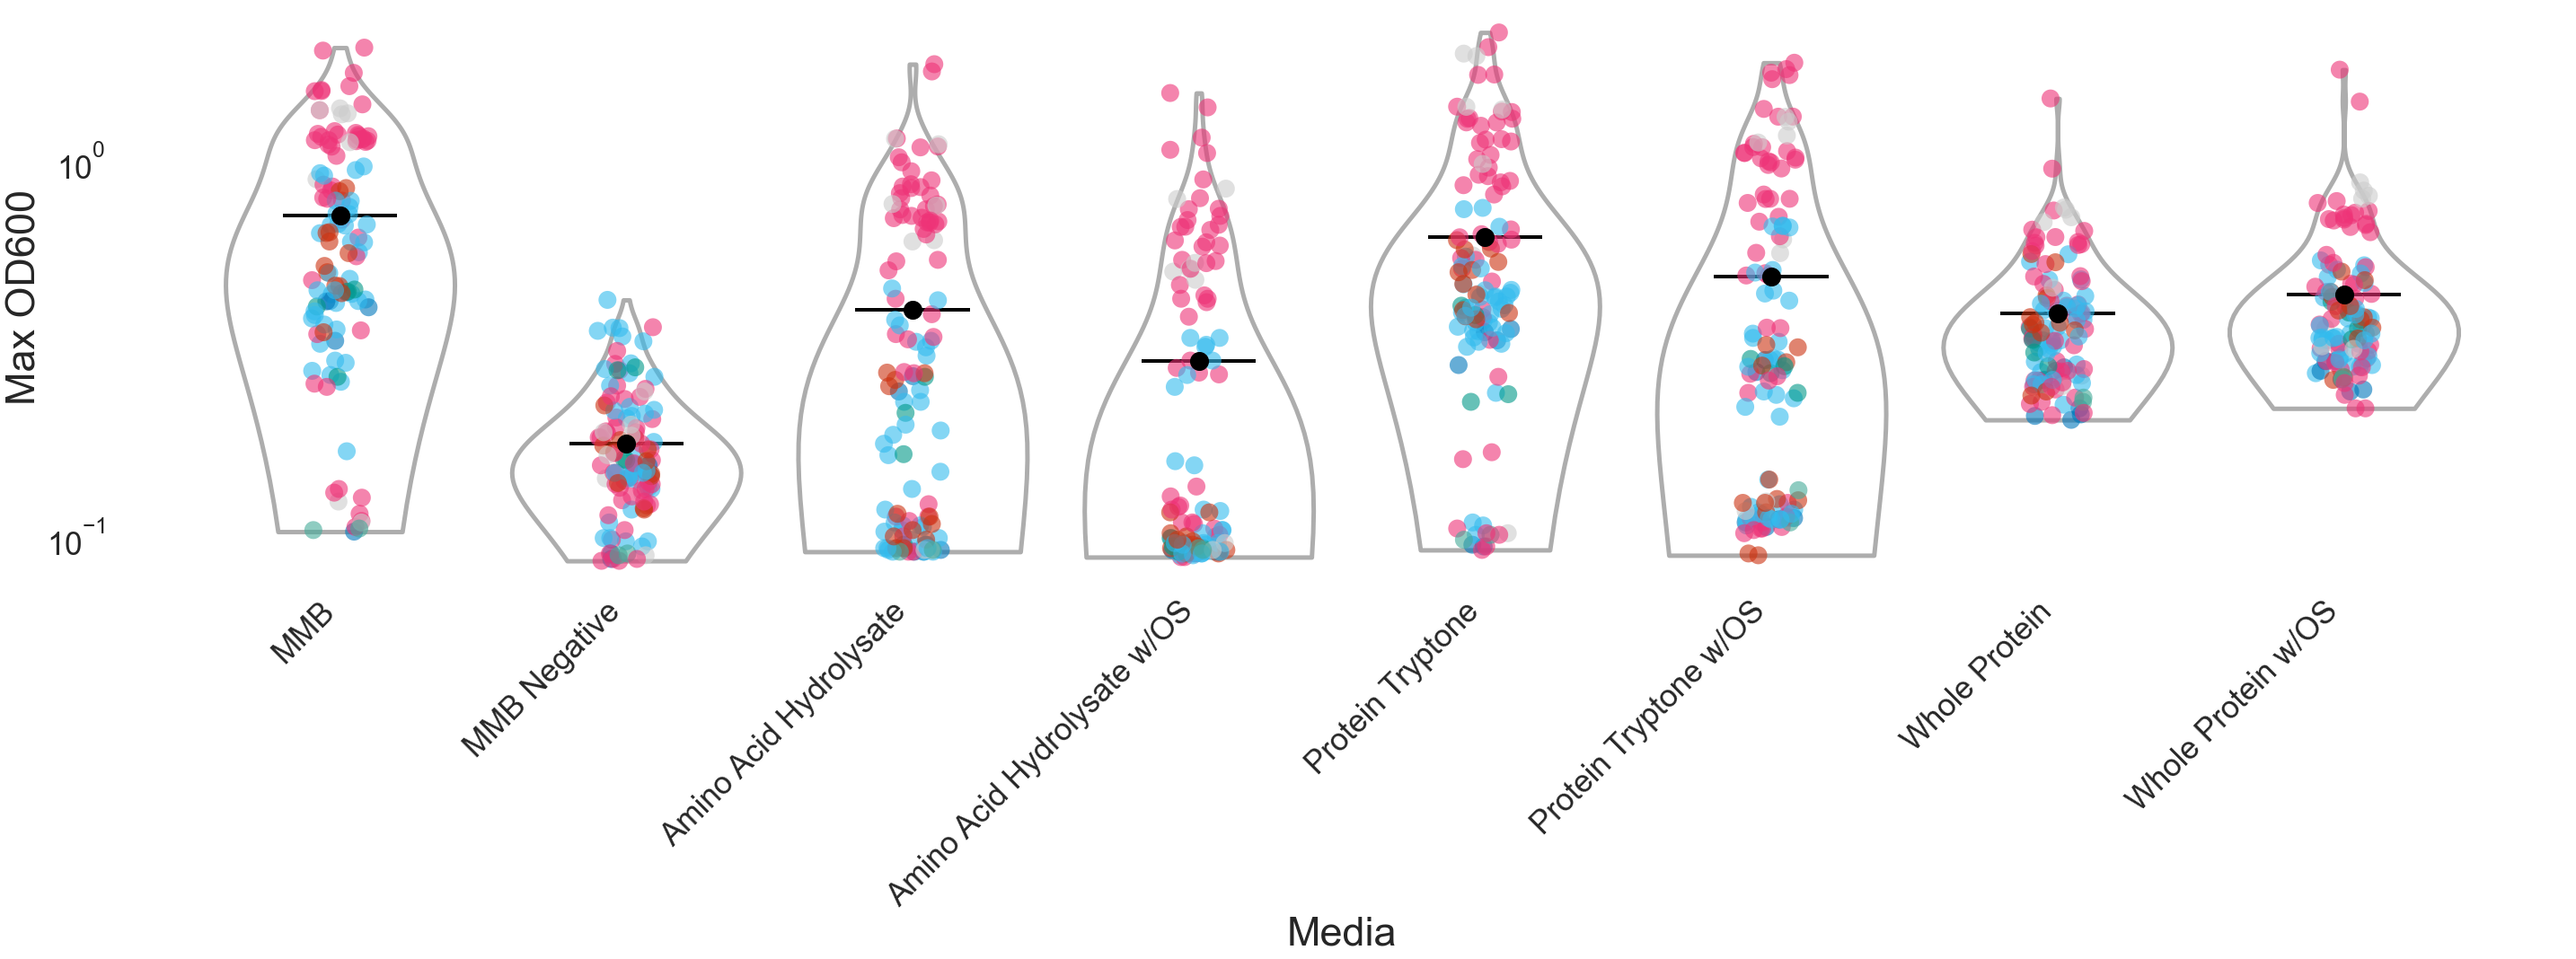

In [9]:

#Plot setup
sns.set_style("whitegrid")   
sns.set(rc={'figure.figsize': (40, 15), 'axes.facecolor': 'white', 'figure.facecolor': 'white'})

order = ["MMB", "MMB Negative", "Amino Acid Hydrolysate", "Amino Acid Hydrolysate w/OS", 
         "Protein Tryptone", "Protein Tryptone w/OS", "Whole Protein", "Whole Protein w/OS"]

y_a = sns.violinplot(
    data=df_Casmax, x="Media", y="OD600", 
    order=order,
    color="white", inner=None, cut=0, width=0.8, density_norm="width", bw_method=0.5, linewidth=5, alpha=0.8
)

sns.stripplot(
    data=df_Casmax, x="Media", y="OD600", hue="Strain", 
    order=order,
    palette = {strain: strain_colors.get(strain, '#CCCCCC') 
               for strain in df_Casmax["Strain"].unique()},
    size=20, jitter=True, alpha=0.6, ax=y_a, legend=False
)

#Add median
group_stats = df_Casmax.groupby("Media")["OD600"].agg(["mean", "std"]).reset_index()
x_pos = {media: i for i, media in enumerate(order)}

for _, row in group_stats.iterrows():
    xpos = x_pos[row["Media"]]
    plt.hlines(y=row["mean"], xmin=xpos-0.2, xmax=xpos+0.2, color="black", linewidth=4)
    plt.scatter(xpos, row["mean"], color="black", s=400, zorder=5)

#Add letters above violins
#y_max = df_Casmax["OD600"].max() * 1.05
#height_step = y_max * 0.05

#for media in order:
    #xpos = x_pos[media]
    #y = y_max
    #plt.text(xpos, y, letters_dict[media], ha='center', va='bottom', fontsize=45)

#Final Adjustments to Plot
plt.xticks(rotation=45, ha='right', fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel('Media', fontsize=45)
plt.ylabel('Max OD600', fontsize=45)
plt.yscale("log")
plt.tight_layout()
plt.show()


#### 'MMB' is the 'Positive Control', 'MMB Negative' is the 'Negative Control', 'Amino Acid Hydrolysate' is 'Amino Acid', 'Protein Tryptone' is 'Peptides', and 'Whole Protein' is 'Protein'. Additionally, w/OS stands for 'with other supplements'.

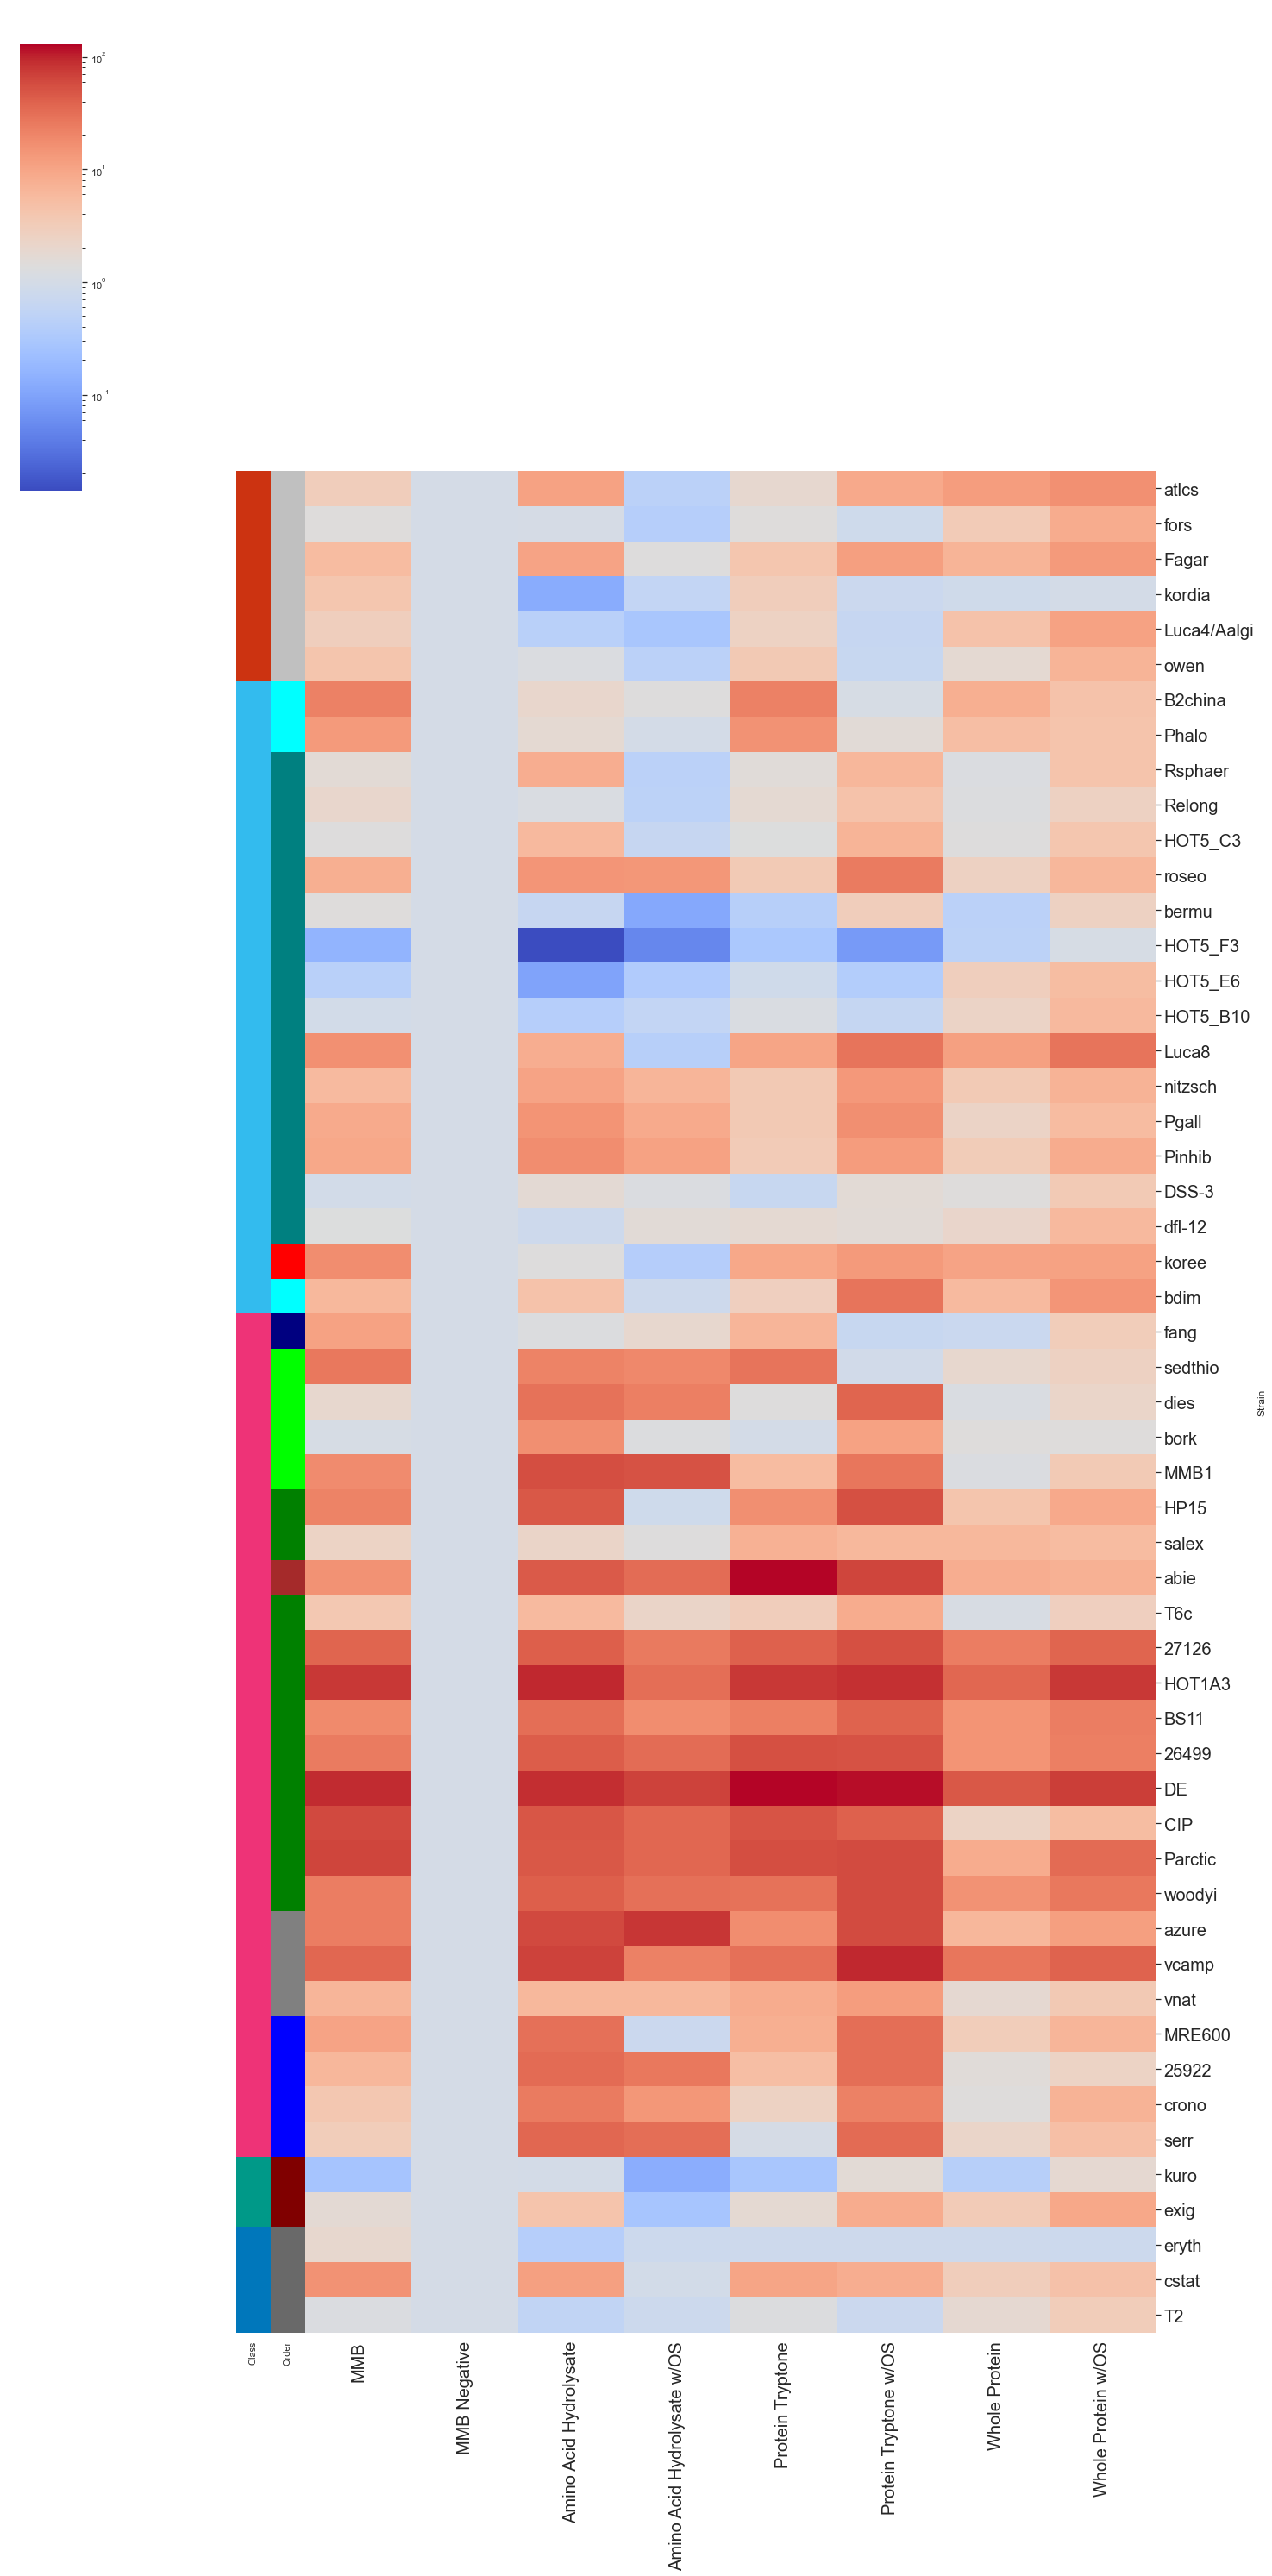

In [10]:
# Convert everything to strings
e.index = e.index.astype(str)
PhyOrder = [str(strain) for strain in PhyOrder]

# Filter e to include only strains in PhyOrder
e_filtered = e.loc[e.index.isin(PhyOrder)]

# Filter PhyOrder to include only strains in e
PhyOrder_filtered = [strain for strain in PhyOrder if strain in e_filtered.index]

# Reorder e based on filtered PhyOrder
e_ordered = e_filtered.reindex(PhyOrder_filtered)

# Mapping Class and Order
df_LibPlotOrd = e_ordered.index.to_series().map(df_Hex.set_index('Strain')['Order'])
df_LibPlotCla = e_ordered.index.to_series().map(df_Hex.set_index('Strain')['Class'])

# Setting color palette using unique colors
unique_order_colors = df_Hex.drop_duplicates('Order')[['Order', 'Hex Order']].set_index('Order')['Hex Order']
unique_class_colors = df_Hex.drop_duplicates('Class')[['Class', 'Hex Class']].set_index('Class')['Hex Class']

# Create lookup dictionaries
lut = dict(zip(unique_order_colors.index, unique_order_colors))
lut1 = dict(zip(unique_class_colors.index, unique_class_colors))

# Map colors to the DataFrame
Order_colour = pd.DataFrame({'Order': df_LibPlotOrd.map(lut)})
Class_colour = pd.DataFrame({'Class': df_LibPlotCla.map(lut1)})
row_colors = pd.concat([Class_colour, Order_colour], axis=1)

# Plotting
LibClustOrd = sns.clustermap(e_ordered, row_colors=row_colors,
                             dendrogram_ratio=0.2, figsize=(20, 40), cmap='coolwarm',
                             col_cluster=False, row_cluster=False, yticklabels=True,
                             norm=LogNorm())

LibClustOrd.ax_heatmap.set_xticklabels(LibClustOrd.ax_heatmap.get_xmajorticklabels(), fontsize=20)
LibClustOrd.ax_heatmap.set_yticklabels(LibClustOrd.ax_heatmap.get_ymajorticklabels(), fontsize=20)

 

plt.show()


#### 'MMB' is the 'Positive Control', 'MMB Negative' is the 'Negative Control', 'Amino Acid Hydrolysate' is 'Amino Acid', 'Protein Tryptone' is 'Peptides', and 'Whole Protein' is 'Protein'. Additionally, w/OS stands for 'with other supplements'.

# Figure 4
### Comparing CFU with FCM across strains

In [11]:
df_FCM_QC_sorted_Cln=pd.read_excel("CFUvsFCM.xlsx", sheet_name= "CFUvsFCM")

### FCM per ml

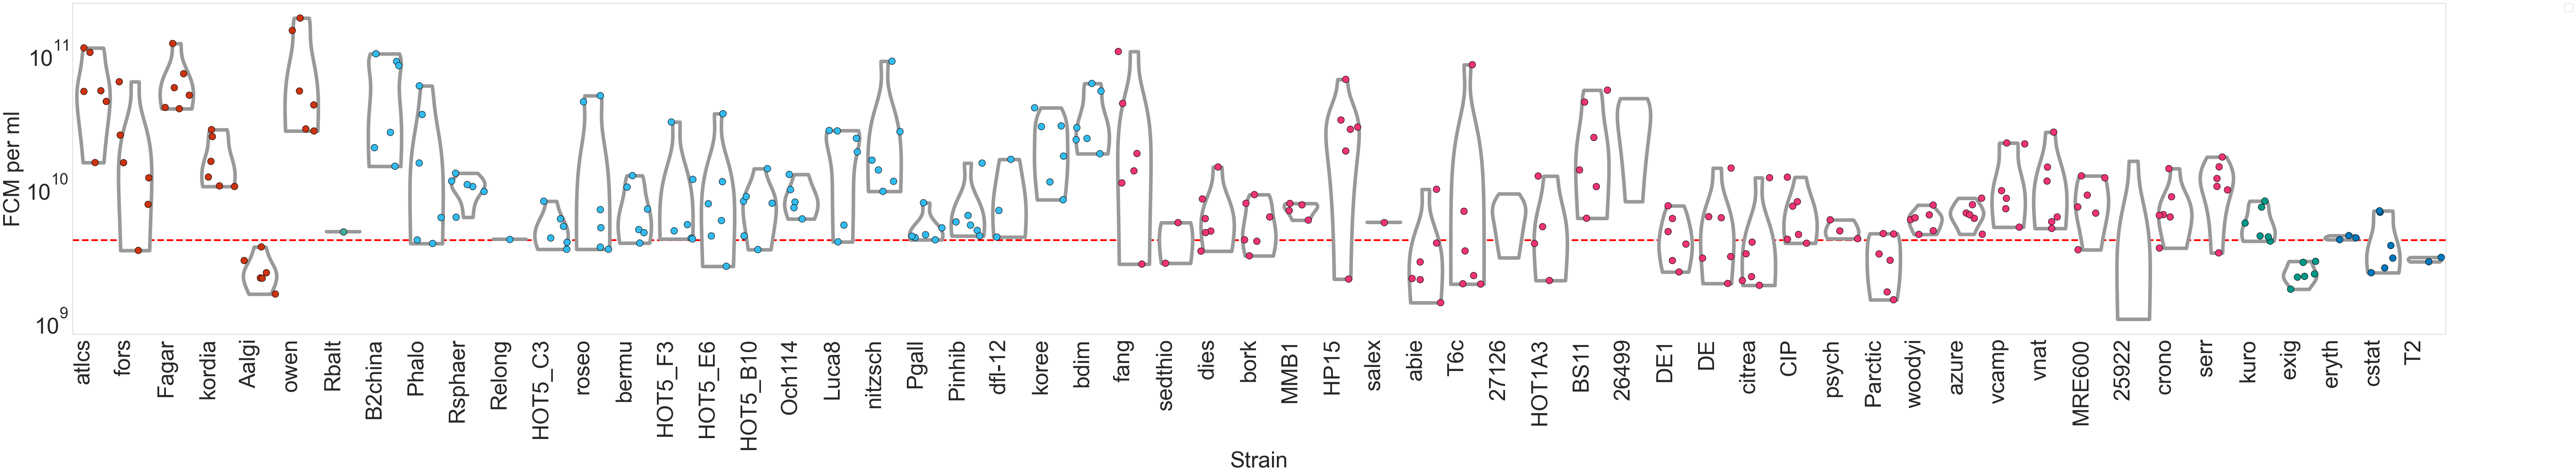

In [12]:
#Defining color Dictionary
color_dict = dict(zip(df_Hex['Class'].unique(), df_Hex['Hex Class'].unique()))

# Set the style and figure size
sns.set_style("whitegrid")
plt.figure(figsize=(80, 15))
color_dict['nan'] = '#EE3377'

# Create the swarmplot
ax = sns.stripplot(data=df_FCM_QC_sorted_Cln, x="Strain", y="Cells per ml", hue="Class", 
                   palette=color_dict, size=15, legend=False, 
                   alpha=1, jitter=0.4,
                   linewidth=1, edgecolor='black')

# Overlay a colorless violin plot with log-transformed data
sns.violinplot(data=df_FCM_QC_sorted_Cln, x="Strain", y="Cells per ml", 
               color="white", density_norm='width', inner=None, 
               linewidth=8, saturation=1, ax=ax, cut=0)

# Customize the plot
plt.axhline(y=4060000000, color='red', linestyle='--', linewidth=4, zorder=0)
plt.xticks(rotation=90, ha='right', fontsize=50)
plt.yticks(rotation=0, ha='right', fontsize=50)
plt.xlabel("Strain", fontsize=50)
plt.ylabel("FCM per ml", fontsize=50)


# Increase the size of the legend and move it outside the plot
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), 
           loc='upper left', borderaxespad=0, fontsize=24)

plt.yscale('log')

# Adjust layout and display the plot
plt.grid(False)
plt.tight_layout()
plt.show()


### CFU per ml

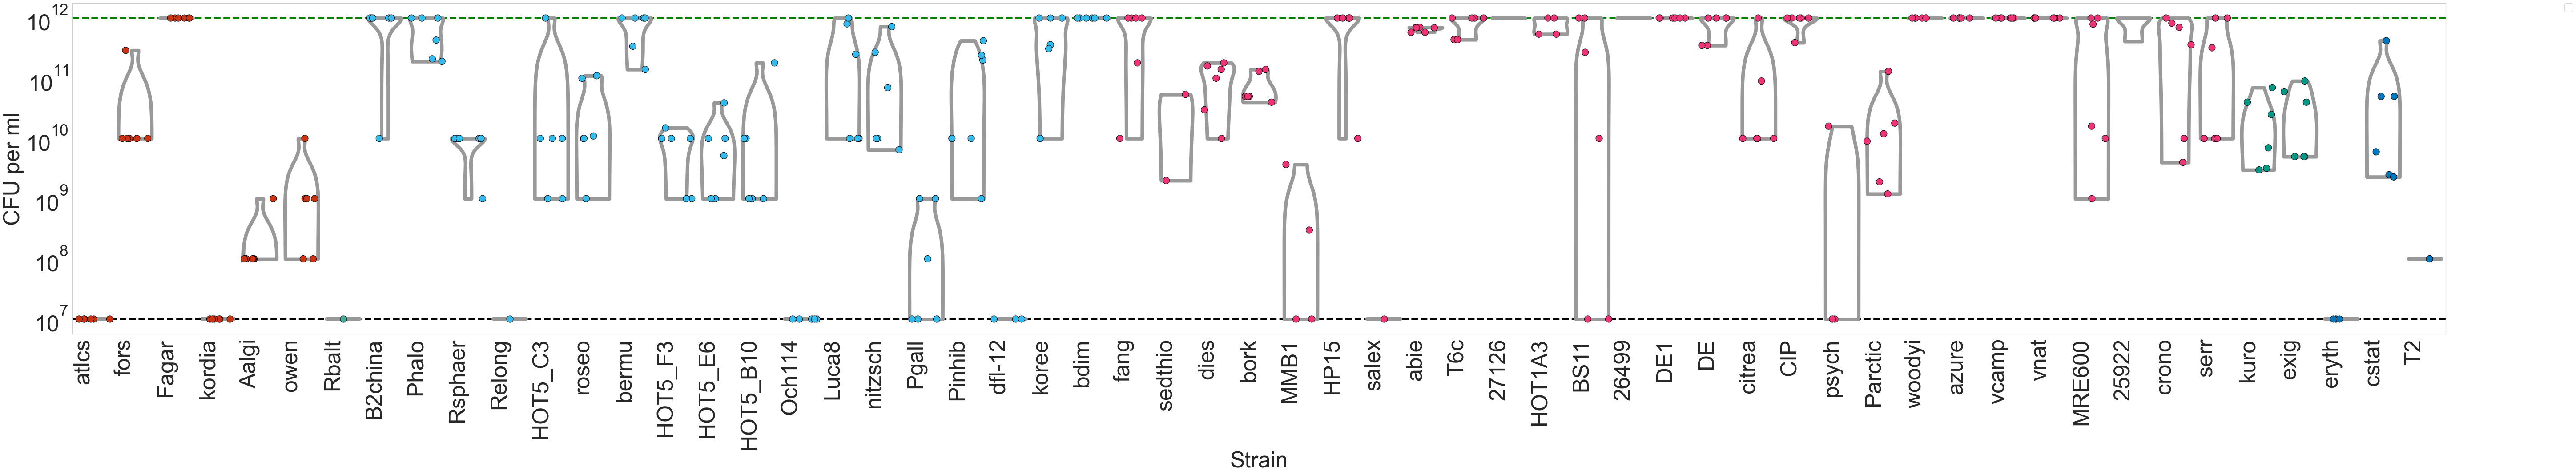

In [13]:
# Set the style and figure size
sns.set_style("whitegrid")
plt.figure(figsize=(80, 15))
color_dict['nan'] = '#EE3377'


# Create the swarmplot
ax = sns.stripplot(data=df_FCM_QC_sorted_Cln, x="Strain", y="CFUml-1", hue="Class", 
                   palette=color_dict, size=15, legend=False,  
                   alpha=1, jitter=0.4,
                   linewidth=1, edgecolor='black')

# Overlay a colorless violin plot with log-transformed data
sns.violinplot(data=df_FCM_QC_sorted_Cln, x="Strain", y="CFUml-1", 
               color="white", density_norm='width', inner=None, 
               linewidth=8, saturation=1, ax=ax, cut=0)

# Customize the plot
plt.axhline(y=10000000, color='black', linestyle='--', linewidth=4, zorder=0)
plt.axhline(y=1000000000000, color='green', linestyle='--', linewidth=4, zorder=0)

plt.xticks(rotation=90, ha='right', fontsize=50)
plt.yticks(rotation=0, ha='right', fontsize=50)
plt.xlabel("Strain", fontsize=50)
plt.ylabel("CFU per ml", fontsize=50)


# Increase the size of the legend and move it outside the plot
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), 
           loc='upper left', borderaxespad=0, fontsize=24)

plt.yscale('log')

# Adjust layout and display the plot
plt.grid(False)
plt.tight_layout()
plt.show()


### CFU per ml/FCM per ml

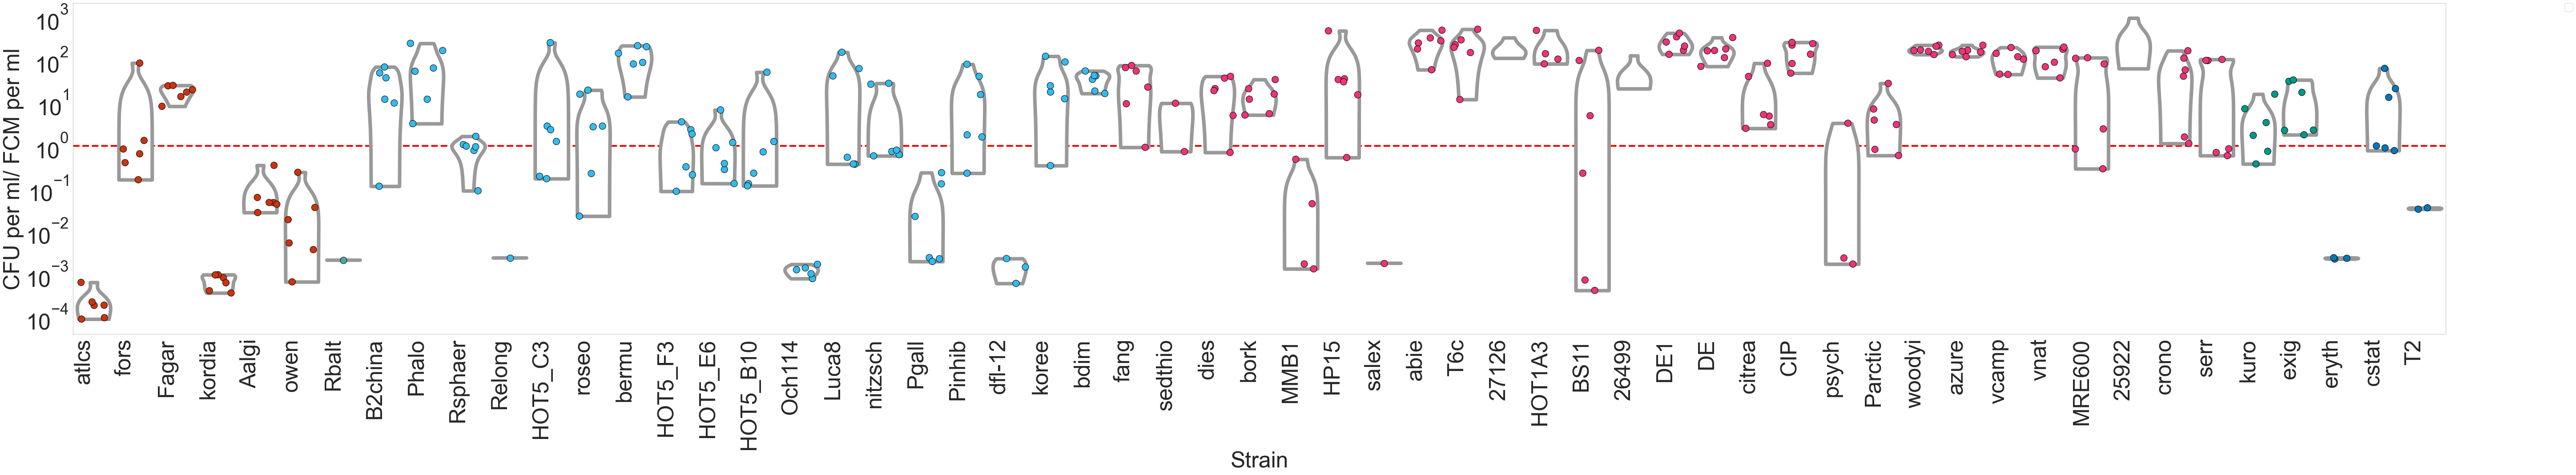

In [14]:
# Set the style and figure size
sns.set_style("whitegrid")
plt.figure(figsize=(80, 15))
color_dict['nan'] = '#EE3377'


# Create the swarmplot
ax = sns.stripplot(data=df_FCM_QC_sorted_Cln, x="Strain", y="CFU Times Higher", hue="Class", 
                   palette=color_dict, size=15, legend=False,  
                   alpha=1, jitter=0.4,
                   linewidth=1, edgecolor='black')

# Overlay a colorless violin plot with log-transformed data
sns.violinplot(data=df_FCM_QC_sorted_Cln, x="Strain", y="CFU Times Higher", 
               color="white", density_norm='width', inner=None, 
               linewidth=8, saturation=1, ax=ax, cut=0)

# Customize the plot
plt.axhline(y=1, color='red', linestyle='--', linewidth=4, zorder=0)
plt.xticks(rotation=90, ha='right', fontsize=50)
plt.yticks(rotation=0, ha='right', fontsize=50)
plt.xlabel("Strain", fontsize=50)
plt.ylabel("CFU per ml/ FCM per ml", fontsize=50)


# Increase the size of the legend and move it outside the plot
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), 
           loc='upper left', borderaxespad=0, fontsize=24)

plt.yscale('log')

# Adjust layout and display the plot
plt.grid(False)
plt.tight_layout()
plt.show()


# Figure 5
### Crystal Violet Biofilm Assay

In [15]:
PhyOrder1=['atlcs', 'fors', 'Fagar', 'kordia', 'Luca4/Aalgi', 'owen', 'PR1red', 'Rbalt', 'B2china', 'Phalo', 'Rsphaer', 'Relong', 'plank',
 'HOT5_B8', 'HOT5_C3', 'roseo', 'bermu', 'HOT5_F3', 'HOT5_E6', 'HOT5_B10', 'Luca8', 'nitzsch', 'Pgall', 'Pinhib', 'DSS-3', 'dfl-12', 'koree',
 'bdim', 'Sflavi', 'fang', 'sedthio', 'dies', 'bork', 'MMB1', 'HP15', 'salex', 'simid', 'abie', 'T6c', '27126', 'HOT1A3', 'BS11', 26499,
 'DE', 'CIP', 'Parctic', 'woodyi', 'azure', 'vcamp', 'vnat', 'MRE600', '25922', 'crono', 'serr', 'vorax', 'kuro', 'exig', 'salin', 'eryth',
 'cstat', 'Ksed', 'T2', 'Control']

In [16]:
df_BFmelt_filtered=pd.read_excel("Biofilm.xlsx", sheet_name="Biofilm")

In [17]:
#Define control group
control = "Control"

# Collect all strains except control
strain_list = [s for s in df_BFmelt_filtered['Strain'].unique() if s != control]

results = []

# Perform t-tests (each vs control)
data_control = df_BFmelt_filtered.loc[df_BFmelt_filtered['Strain'] == control, 'OD550']

for strain in strain_list:
    data_strain = df_BFmelt_filtered.loc[df_BFmelt_filtered['Strain'] == strain, 'OD550']
    
    # Welch’s t-test
    stat, pval = ttest_ind(data_control, data_strain, equal_var=False, nan_policy='omit')
    
    results.append([strain, control, stat, pval])

df_stats = pd.DataFrame(results, columns=['Group', 'Control', 't_stat', 'p_value'])

#Manual Benjamini–Hochberg correction
pvals = df_stats['p_value'].values
m = len(pvals)  
sorted_idx = np.argsort(pvals)
sorted_pvals = np.array(pvals)[sorted_idx]

bh_adj = np.empty(m)
for i, p in enumerate(sorted_pvals, start=1):
    bh_adj[i-1] = p * m / i
bh_adj = np.minimum.accumulate(bh_adj[::-1])[::-1]

# Reorder back to original
pvals_adj = np.empty(m)
pvals_adj[sorted_idx] = bh_adj

df_stats['p_adj'] = pvals_adj
df_stats['reject_H0'] = df_stats['p_adj'] < 0.05

#Show results
pd.set_option("display.max_rows", 200)
print(df_stats)

          Group  Control    t_stat       p_value         p_adj  reject_H0
0         cstat  Control  0.728202  4.768151e-01  6.622431e-01      False
1         Pgall  Control -0.170392  8.668831e-01  9.422642e-01      False
2         eryth  Control  0.254625  8.027443e-01  9.122094e-01      False
3       Rsphaer  Control -0.020992  9.835237e-01  9.898655e-01      False
4       B2china  Control -0.012922  9.898655e-01  9.898655e-01      False
5         Phalo  Control  1.458670  1.626774e-01  2.804783e-01      False
6        dfl-12  Control -0.576476  5.714693e-01  7.326529e-01      False
7       nitzsch  Control  2.653074  1.488637e-02  3.917467e-02       True
8        Pinhib  Control -0.748411  4.645610e-01  6.622431e-01      False
9         koree  Control -2.039737  5.804717e-02  1.207509e-01      False
10        DSS-3  Control  0.661786  5.191940e-01  7.016136e-01      False
11        roseo  Control  0.310994  7.599073e-01  8.836131e-01      False
12         bdim  Control  6.896828  6.

<ipython-input-18-545016a795b3>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


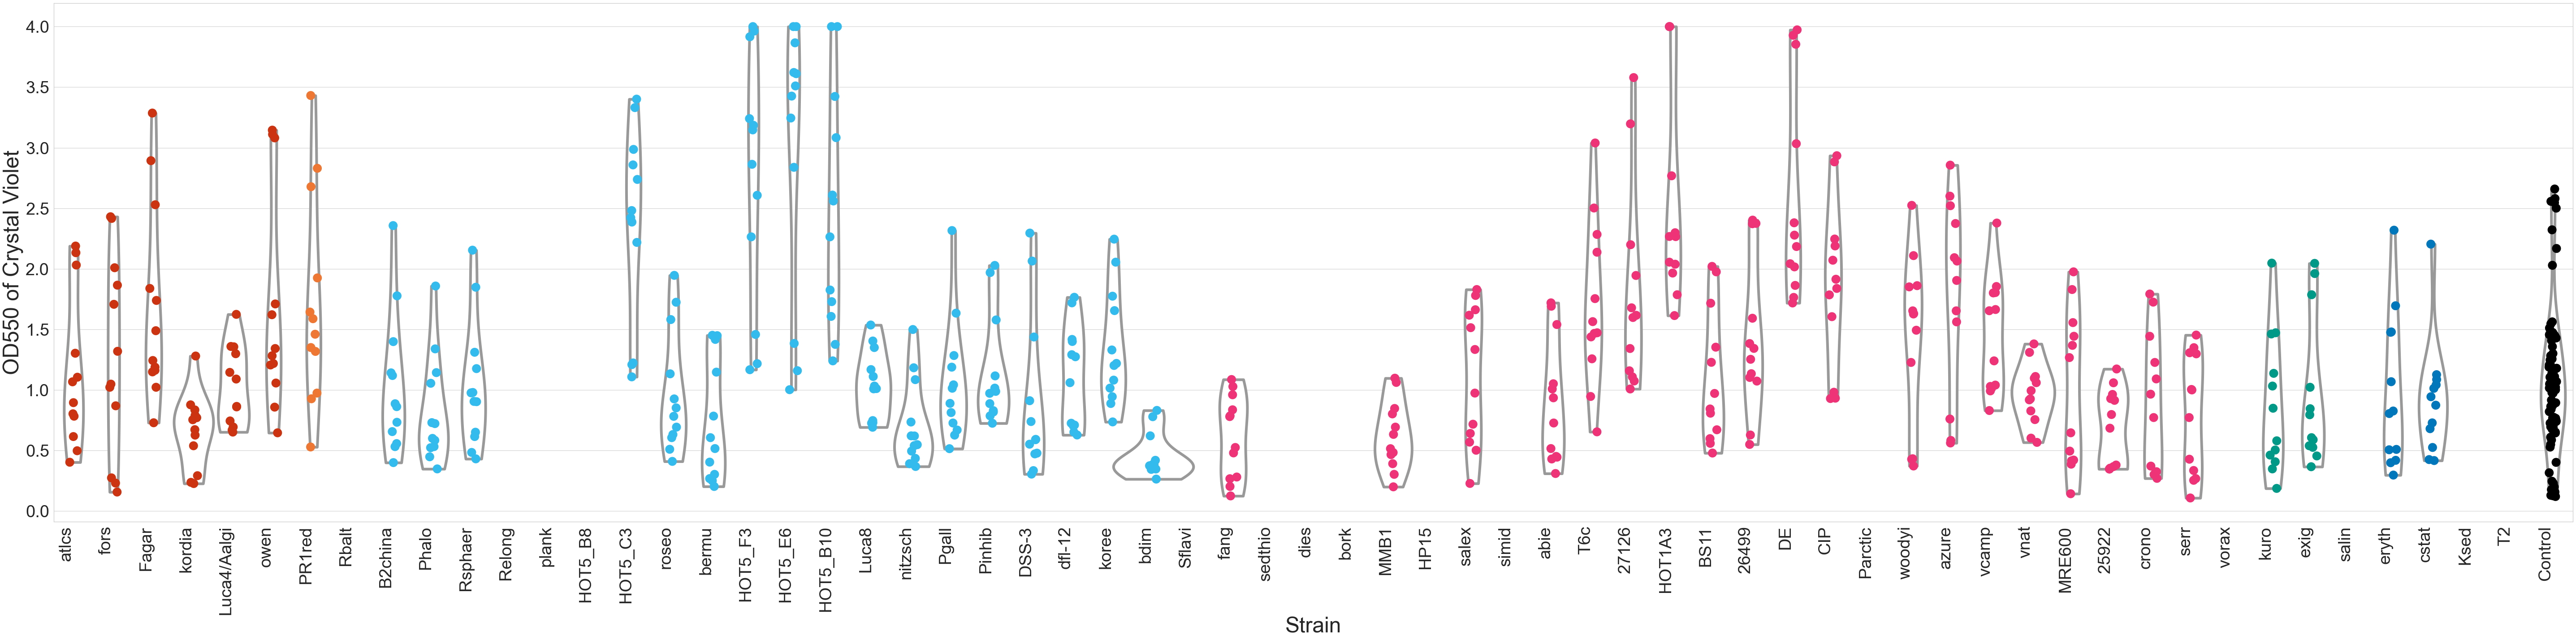

In [18]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(80, 20))  # Increased height for better visibility


# Add the control strain with black color if it's in PhyOrder
if 'Control' in PhyOrder1:
    strain_colors['Control'] = '#000000'

# Create the violinplot
sns.violinplot(
    data=df_BFmelt_filtered,
    x='Strain',
    y='OD550',
    order=PhyOrder1,
    ax=ax,
    #palette={strain: strain_colors.get(strain, '#CCCCCC') for strain in new_order},
    color="white",
    width=2,
    linewidth=6,
    alpha=1,
    inner=None,  # Remove the box plot inside the violin
    cut=0  # Limit the violin range to the observed data
)

# Add the scatterplot
# Convert all strain names to str to avoid key mismatch
palette = {str(strain): strain_colors.get(str(strain), '#CCCCCC') for strain in PhyOrder1}

sns.stripplot(
    data=df_BFmelt_filtered.assign(Strain=df_BFmelt_filtered['Strain'].astype(str)),
    x='Strain',
    y='OD550',
    order=[str(x) for x in PhyOrder1],
    ax=ax,
    palette=palette,
    alpha=1,
    jitter=True,
    size=20
)


# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right',fontsize=38)
plt.yticks(fontsize=38)

# Set labels and title
plt.xlabel('Strain', fontsize=48)
plt.ylabel('OD550 of Crystal Violet',fontsize=48)

# Adjust layout and show plot
plt.tight_layout()
plt.show()